# Clonamos el repositorio para obtener los dataSet

In [ ]:
!git clone https://github.com/joanby/tensorflow.git

# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Test it

In [ ]:
!ls '/content/drive/My Drive' 

# Google colab tools

In [1]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

##Especificando la versión de TensorFlow

Ejecutando "importar tensorflow" importará la versión por defecto (actualmente 2.x). Puedes usar la 1.x ejecutando una celda con la "versión mágica de tensorflow" **antes de ejecutar "importar tensorflow".

### Si no funciona hacer el pip install


In [2]:
#!pip install tensorflow==1.14
%tensorflow_version 1.x

TensorFlow 1.x selected.


# Importar Tensorflow

In [3]:
import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt

1.15.2


In [4]:
session = tf.Session()

# Método de la matriz inversa para la regresión lineal

$$Ax=b$$

$$A^TAx = A^Tb$$

$$x = (A^TA)^{-1}A^Tb$$

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
x_vals = np.linspace(0,10,100)
y_vals = x_vals + np.random.normal(0,1,100)

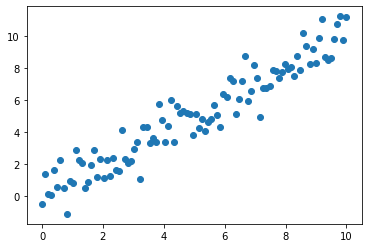

In [7]:
plt.plot(x_vals, y_vals, 'o', label = "Datos")

In [8]:
x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1,100)))
A = np.column_stack((x_vals_column, ones_column))
b = np.transpose(np.matrix(y_vals))

In [9]:
A_tensor = tf.constant(A)
b_tensor = tf.constant(b)

In [10]:
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
tA_A_inv = tf.matrix_inverse(tA_A)
product = tf.matmul(tA_A_inv, tf.transpose(A_tensor))
solution = tf.matmul(product, b_tensor)
solution_eval = session.run(solution)

In [11]:
solution_eval

array([[1.00394871],
       [0.00448074]])

In [12]:
slope = solution_eval[0][0]
intercept = solution_eval[1][0]
print(str(np.round(slope,3))+"x+"+str(np.round(intercept,3)))

1.004x+0.004


In [13]:
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+intercept)

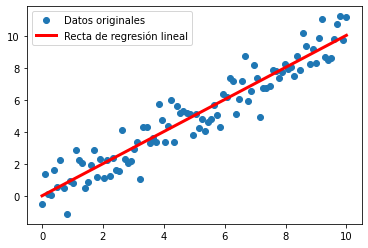

In [14]:
plt.plot(x_vals, y_vals, 'o', label = "Datos originales")
plt.plot(x_vals, best_fit, 'r-', label = "Recta de regresión lineal", linewidth = 3)
plt.legend(loc = "upper left")
plt.show()

# Método de la descomposición de Cholesky

$$A = LU$$
- $L$: matriz triangular superior
- $U$: matriz triangular inferior
- $L^T=U$

$$Ax=b$$

$$A^TAx=A^Tb$$

$$LUx=A^Tb$$

$$Ly=A^Tb$$
$$Ux=y$$

In [15]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
session = tf.Session()

In [16]:
A_tensor = tf.constant(A)
b_tensor = tf.constant(b)

In [17]:
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
L = tf.cholesky(tA_A)
tA_b = tf.matmul(tf.transpose(A_tensor), b_tensor)
y_sol = tf.matrix_solve(L, tA_b)
x_sol = tf.matrix_solve(tf.transpose(L), y_sol)

In [18]:
sol_eval = session.run(x_sol)

In [19]:
sol_eval

array([[1.00394871],
       [0.00448074]])

In [20]:
slope = sol_eval[0][0]
intercept = sol_eval[1][0]
print(str(np.round(slope, 3))+"x+"+str(np.round(intercept,3)))

1.004x+0.004


In [21]:
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+intercept)

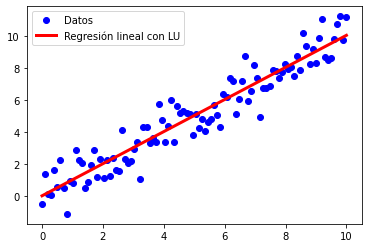

In [22]:
plt.plot(x_vals, y_vals, 'bo', label = "Datos")
plt.plot(x_vals, best_fit, 'r-', label = "Regresión lineal con LU", linewidth = 3)
plt.legend(loc="upper left")
plt.show()